In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from matplotlib.tri import Triangulation
import glob

main_dir = '/Users/leec813/GitHub/WE-Validate/'

## Time series

In [2]:
def read_ts_df(case, org):

    df = pd.read_csv(main_dir+'output/'+case+'/ts_'+org+'.csv', header=[0, 1, 2], index_col=[0])
    df.index = pd.to_datetime(df.index)
    
    return df

### US case

In [3]:
case = 'us'

df_dw = read_ts_df(case, 'dw')
df_meso = read_ts_df(case, 'meso')
df_nrel = read_ts_df(case, 'nrel')
df_weprog = read_ts_df(case, 'weprog')

# df.columns.levels[1]
# df['40'][df.columns.levels[1][0]].columns == 'sodar_ws'
# df.columns.levels[2]

In [4]:
def plot_us_ws_ts(lev, case):
    
    lev = str(lev)

    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()
    
    al_pha = 0.6

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0.45, 0.6, 75))))

    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'], 
                    c='deepskyblue', label='weprog', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'], 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)
            
#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws'], c='darkgreen', label='meso', alpha=al_pha)
        else:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws'], c='darkgreen', label='_nolegend_', alpha=al_pha)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.7, 1, 2))))

    ax.plot(df_dw.index, df_dw[lev]['dw2km']['dw2km_ws'], c='b', label='dw', alpha=al_pha)
    ax.plot(df_dw.index, df_dw[lev]['dw3km']['dw3km_ws'], c='b', label='_nolegend_', alpha=al_pha)
            
    ax.plot(df_nrel.index, df_nrel[lev]['nrel']['nrel_wrf_ws'], label='nrel', c='orange')

    ax.plot(df_dw.index, df_dw[lev]['dw2km']['sodar_ws'], label='sodar', c='k', linewidth=2.5)

    var_txt = 'wind speed at '+lev+' m'
    
    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

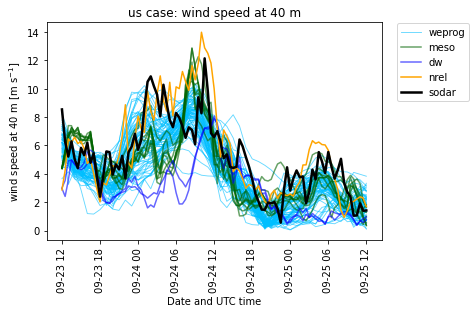

In [5]:
plot_us_ws_ts(40, case)

In [11]:
df_dw['40']['dw2km']['dw2km_ws'].mean()

2.9141237113402063

In [59]:
def plot_us_ws_diffmean(lev, case):

    lev = str(lev)

    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()

    al_pha = 0.6

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0.45, 0.6, 75))))

    sodar_dev = df_dw[lev]['dw2km']['sodar_ws']-df_dw[lev]['dw2km']['sodar_ws'].mean()
    sodar_dev_weprog = df_weprog[lev]['weprog1']['sodar_ws']-df_weprog[lev]['weprog1']['sodar_ws'].mean()

    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws']\
                    -df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'].mean()-sodar_dev_weprog, 
                    c='deepskyblue', label='weprog', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws']\
                    -df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'].mean()-sodar_dev_weprog, 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws']\
                    -df_meso[lev]['meso'+i]['meso'+i+'_ws'].mean()-sodar_dev, 
                    c='darkgreen', label='meso', alpha=al_pha)
        else:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws']\
                    -df_meso[lev]['meso'+i]['meso'+i+'_ws'].mean()-sodar_dev, 
                    c='darkgreen', label='_nolegend_', alpha=al_pha)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.7, 1, 2))))

    ax.plot(df_dw.index, df_dw[lev]['dw2km']['dw2km_ws']-df_dw[lev]['dw2km']['dw2km_ws'].mean()-sodar_dev, 
            c='b', label='dw', alpha=al_pha)
    ax.plot(df_dw.index, df_dw[lev]['dw3km']['dw3km_ws']-df_dw[lev]['dw3km']['dw3km_ws'].mean()-sodar_dev, 
            c='b', label='_nolegend_', alpha=al_pha)

    ax.plot(df_nrel.index, df_nrel[lev]['nrel']['nrel_wrf_ws']\
            -df_nrel[lev]['nrel']['nrel_wrf_ws'].mean()-sodar_dev, 
            label='nrel', c='orange')

    # ax.plot(df_dw.index, df_dw[lev]['dw2km']['sodar_ws']-df_dw[lev]['dw2km']['sodar_ws'].mean(), 
    #         label='sodar', c='k', linewidth=2.5)

    var_txt = 'wind speed difference from mean at '+lev+' m'

    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

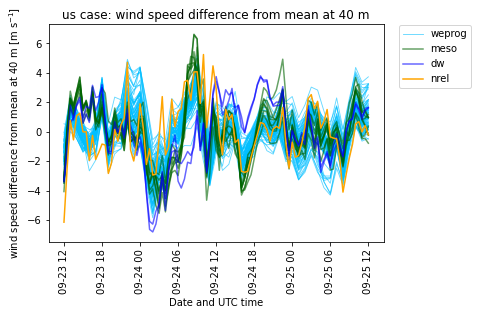

In [60]:
plot_us_ws_diffmean(40, case)

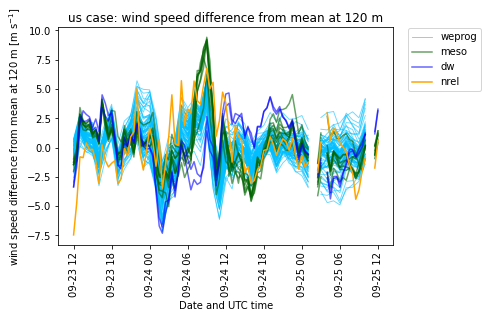

In [61]:
plot_us_ws_diffmean(120, case)

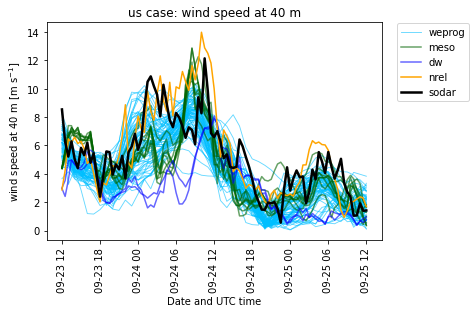

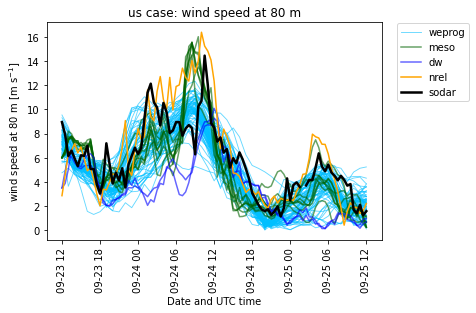

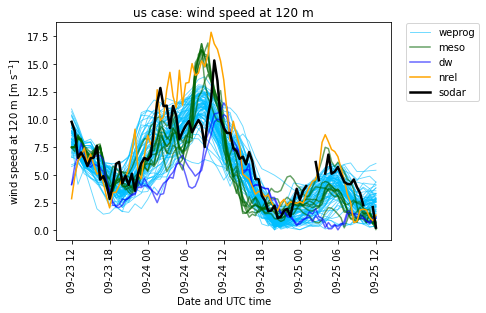

In [73]:
plot_us_ws_ts(40, case)
plot_us_ws_ts(80, case)
plot_us_ws_ts(120, case)

### EU cases

In [95]:
def plot_eu_ws_ts(lev, case):
    
    lev = str(lev)

    al_pha = 0.6
    
    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.65, 0.9, 2))))
    
    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'], 
                    c='deepskyblue', label='weprog', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_weprog.index, df_weprog[lev]['weprog'+i]['weprog'+i+'_ws'], 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)

    ax.plot(df_dw.index, df_dw[lev]['dw0321']['dw0321_ws'], c='b', label='dw', alpha=al_pha)
    ax.plot(df_dw.index, df_dw[lev]['dw0400']['dw0400_ws'], c='b', label='_nolegend_', alpha=al_pha)

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws'],
                    c='darkgreen', label='meso', alpha=al_pha)
        else:
            ax.plot(df_meso.index, df_meso[lev]['meso'+i]['meso'+i+'_ws'],
                    c='darkgreen', label='_nolegend_', alpha=al_pha)

#     ax.plot(df_nrel.index, df_dtu[lev]['nrel']['nrel_wrf_ws'], label='nrel', c='orange')
    
#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Purples(np.linspace(0.65, 0.9, 2))))

    ax.plot(df_dtu.index, df_dtu[lev]['dtuewp']['dtuewp_ws'], c='purple', label='dtu', alpha=al_pha)
    ax.plot(df_dtu.index, df_dtu[lev]['dtutke']['dtutke_ws'], c='purple', label='_nolegend_', alpha=al_pha)
    
    ax.plot(df_nrel.index, df_nrel[lev]['nrel']['nrel_ws'], label='nrel', c='orange')

    ax.plot(df_dw.index, df_dw[lev]['dw0321'][case+'_ws'], label='fino tower', c='k', linewidth=2)

    var_txt = 'wind speed at '+lev+' m'
    
    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

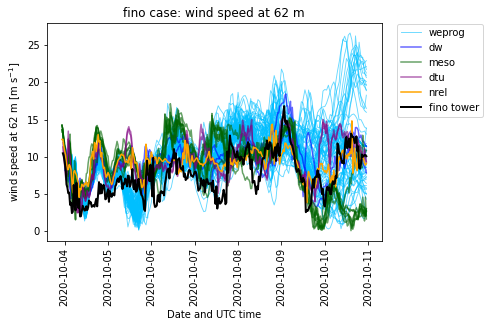

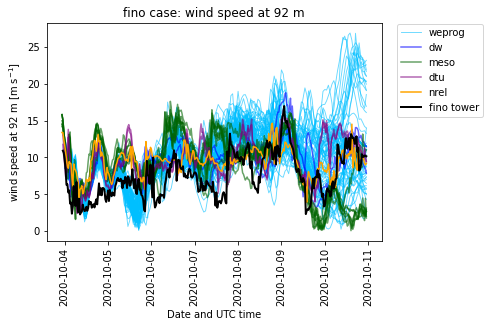

In [98]:
case = 'fino'

df_dw = read_ts_df(case, 'dw')
df_meso = read_ts_df(case, 'meso')
df_dtu = read_ts_df(case, 'dtu')
df_nrel = read_ts_df(case, 'nrel')
df_weprog = read_ts_df(case, 'weprog')

plot_eu_ws_ts(62, case)
# plot_eu_ws_ts(72, case)
# plot_eu_ws_ts(82, case)
plot_eu_ws_ts(92, case)

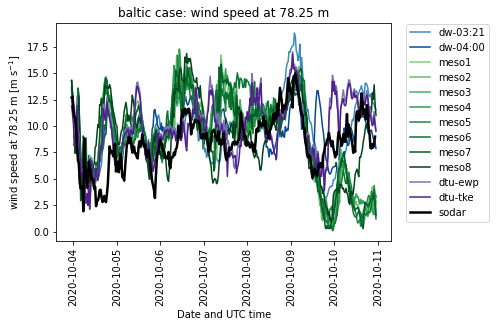

In [63]:
case = 'baltic'

df_dw = read_ts_df(case, 'dw')
df_meso = read_ts_df(case, 'meso')
df_dtu = read_ts_df(case, 'dtu')

plot_eu_ws_ts(78.25, case)

## Metrics

In [153]:
def read_metrics_df(case, org):

    return pd.read_csv(main_dir+'output/'+case+'/metrics_'+org+'.csv', header=[0, 1, 2], index_col=[0])

def get_metrics_df(case, org_list):

    for ind, org in enumerate(org_list):

        df = read_metrics_df(case, org)

        if ind == 0: 
            df_metrics = df
        else:
            df_metrics = df_metrics.join(df)
            
    return df_metrics

# df_metrics_us = get_metrics_df('us', ['dw', 'meso', 'nrel'])
df_metrics_us = get_metrics_df('us', ['dw', 'meso', 'nrel', 'weprog'])

df_metrics_fino = get_metrics_df('fino', ['dw', 'meso', 'nrel', 'dtu', 'weprog'])

In [66]:
df_metrics_us

40                    80                   120             \
              dw2km      dw3km      dw2km      dw3km      dw2km      dw3km   
           dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   
rmse       3.240010   3.033471   3.364878   3.155523   3.353622   3.197650   
crmse      2.318738   2.167166   2.474001   2.262455   2.593468   2.365471   
nrmse      0.595209   0.534723   0.585461   0.509882   0.543515   0.481819   
bias      -2.262990  -2.122577  -2.280729  -2.199687  -2.126196  -2.151630   
bias_pct -36.960101 -34.579068 -35.832912 -34.122847 -25.671608 -25.438930   
mae        2.480103   2.359072   2.601562   2.448021   2.578804   2.479674   
mae_pct   47.608359  45.735662  46.069377  43.499233  46.191457  45.868627   

                 40                                   ...        120  \
              meso1      meso2      meso3      meso4  ...      meso2   
           meso1_ws   meso2_ws   meso3_ws   meso4_ws  ...   meso2_ws   
rmse       2.096215   2.123497   2.173146   2.164018  ...   2.454862   
crmse      1.946613   1.970466   1.998673   1.998781  ...   2.346489   
nrmse      0.408877   0.418767   0.435075   0.430583  ...   0.428375   
bias      -0.777699  -0.791521  -0.853155  -0.829366  ...  -0.721344   
bias_pct  -4.430783  -8.078842  -9.575845  -7.802326  ... -11.967565   
mae        1.607864   1.620689   1.685233   1.683062  ...   1.899133   
mae_pct   34.582046  34.133127  36.725201  36.889527  ...  32.425942   

                                                                            \
              meso3      meso4      meso5      meso6      meso7      meso8   
           meso3_ws   meso4_ws   meso5_ws   meso6_ws   meso7_ws   meso8_ws   
rmse       2.510902   2.525964   2.531131   1.817847   2.774149   2.331547   
crmse      2.344036   2.365960   2.421273   1.812444   2.528783   2.256735   
nrmse      0.448190   0.448248   0.419450   0.298086   0.499497   0.403246   
bias      -0.900070  -0.884719  -0.737605  -0.140054  -1.140684  -0.585882   
bias_pct -17.381314 -15.966122   2.111305  -2.491020 -17.691522  -5.043878   
mae        1.935363   1.930802   2.032431   1.454014   2.186242   1.789778   
mae_pct   32.660390  31.972891  42.223683  25.868035  36.923527  35.992735   

                  40          80         120  
                nrel        nrel        nrel  
         nrel_wrf_ws nrel_wrf_ws nrel_wrf_ws  
rmse        2.029357    2.358338    2.626287  
crmse       1.974712    2.274215    2.535024  
nrmse       0.353038    0.353090    0.358035  
bias        0.467761    0.624263    0.686322  
bias_pct   16.822186   12.701559   15.104828  
mae         1.550987    1.752744    1.938592  
mae_pct    36.889154   33.156328   37.869157  

[7 rows x 33 columns]

In [197]:
df_metrics_fino

62                    72                    82             \
             dw0321     dw0400     dw0321     dw0400     dw0321     dw0400   
          dw0321_ws  dw0400_ws  dw0321_ws  dw0400_ws  dw0321_ws  dw0400_ws   
rmse       2.955345   3.371705   3.042856   3.438431   2.962273   3.384893   
crmse      2.149061   2.758834   2.179586   2.779610   2.199241   2.815816   
nrmse      0.267614   0.360365   0.271760   0.364524   0.269414   0.361776   
bias       2.028694   1.938358   2.123294   2.024000   1.984540   1.878478   
bias_pct  38.670469  45.553132  40.340550  47.209574  36.886215  43.324515   
mae        2.443828   2.734239   2.523650   2.794149   2.431187   2.768806   
mae_pct   43.617742  52.795205  45.075487  54.193480  42.029066  51.276813   

                 92                    62             ...          92  \
             dw0321     dw0400      meso1      meso2  ...    weprog66   
          dw0321_ws  dw0400_ws   meso1_ws   meso2_ws  ... weprog66_ws   
rmse       3.039636   3.443262   4.609557   4.754725  ...    3.293623   
crmse      2.189045   2.805418   4.424289   4.567557  ...    2.860031   
nrmse      0.271287   0.365533   0.539354   0.554236  ...    0.352266   
bias       2.108902   1.996418   1.293709   1.320921  ...    1.633454   
bias_pct  39.721148  46.372354  36.431797  37.097954  ...   33.672843   
mae        2.518338   2.806925   3.681684   3.812739  ...    2.726192   
mae_pct   44.516741  53.651701  61.647231  63.481994  ...   46.022539   

                                                                      \
            weprog67    weprog68    weprog69    weprog70    weprog71   
         weprog67_ws weprog68_ws weprog69_ws weprog70_ws weprog71_ws   
rmse        4.344339    3.666007    4.859805    3.620163    5.065658   
crmse       3.887327    3.030338    3.777258    2.935428    3.990145   
nrmse       0.462498    0.341011    0.390146    0.343210    0.449211   
bias        1.939581    2.063167    3.057782    2.118690    3.120838   
bias_pct   44.728498   36.912935   51.828989   40.093038   61.592642   
mae         3.511818    2.993553    3.841096    2.876329    4.217346   
mae_pct    61.515667   48.788074   61.619277   50.616588   73.239630   

                                                          
            weprog72    weprog73    weprog74    weprog75  
         weprog72_ws weprog73_ws weprog74_ws weprog75_ws  
rmse        3.496568    5.901699    4.021024    4.822039  
crmse       3.222567    3.857574    3.474556    3.786271  
nrmse       0.395427    0.357194    0.410596    0.424696  
bias        1.356853    4.466449    2.023881    2.986003  
bias_pct   30.949537   71.910972   41.067068   58.758456  
mae         3.004893    4.933929    3.326030    3.654450  
mae_pct    52.438641   78.133378   56.043500   66.894705  

[7 rows x 352 columns]

In [181]:
sorted(df_metrics.columns.levels[0].astype(int))

[40, 80, 120]

In [68]:
def plot_metric_hist(df, metric): 
    
#     hgt_list = sorted(df.columns.levels[0].astype(int))
    hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[-1]
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[1]
    
    for hgt in hgt_list: 
    
#     plt.hist(df['40'].loc[df.index == metric].values[0], alpha=0.5, label='40')
#     plt.hist(df['80'].loc[df.index == metric].values[0], alpha=0.5, label='80')
#     plt.hist(df['120'].loc[df.index == metric].values[0], alpha=0.5, label='120')

        plt.hist(df[str(hgt)].loc[df.index == metric].values[0], alpha=0.5, label=str(hgt))

    plt.title(metric)
    plt.legend()
    plt.show()

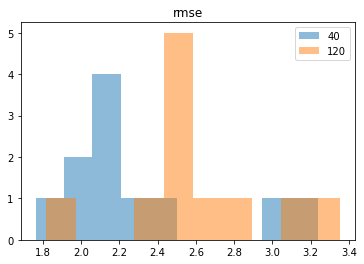

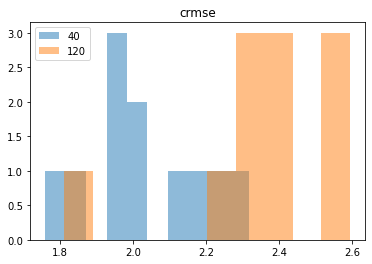

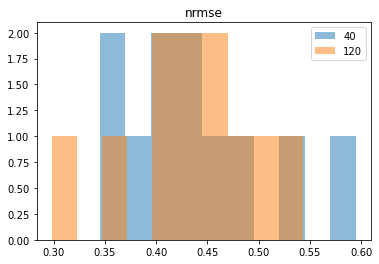

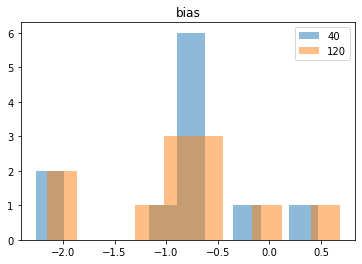

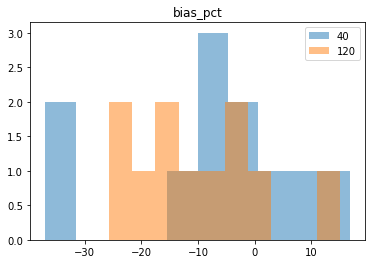

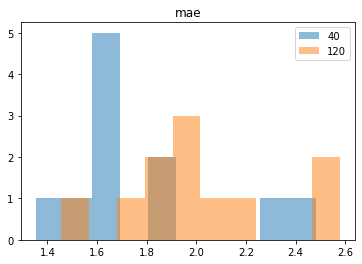

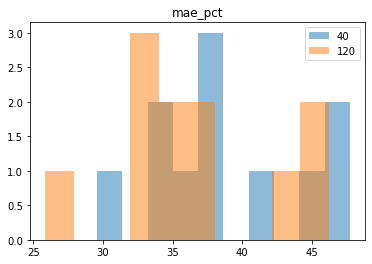

In [69]:
for m in df_metrics_us.index:
    plot_metric_hist(df_metrics_us, m)

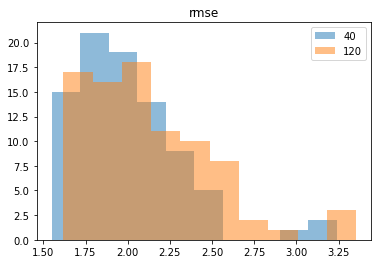

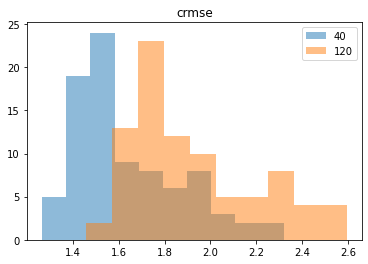

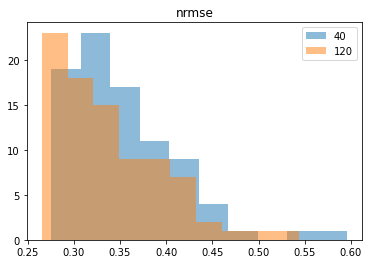

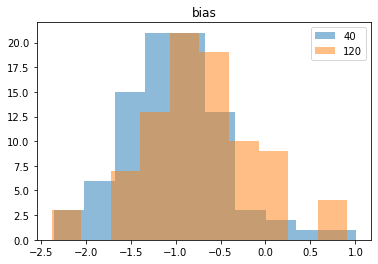

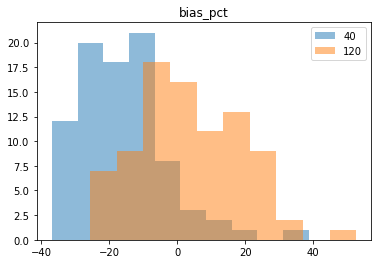

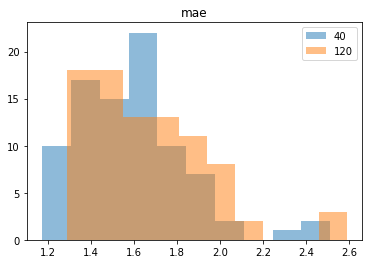

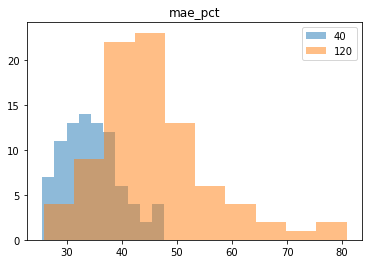

In [199]:
for m in df_metrics_us.index:
    plot_metric_hist(df_metrics_us, m)

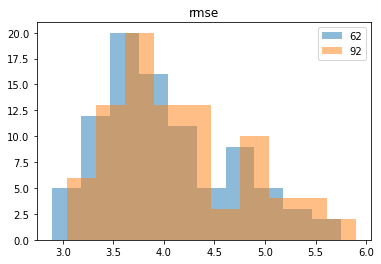

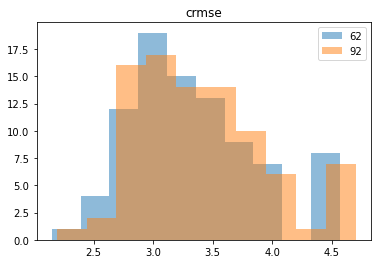

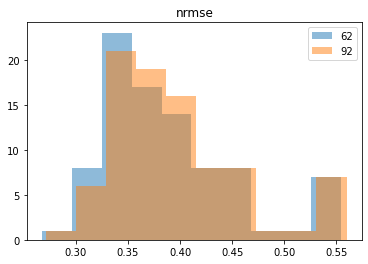

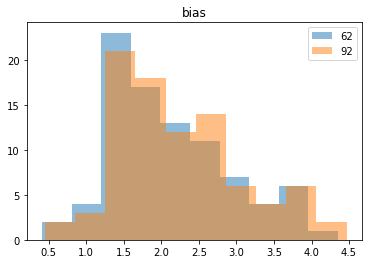

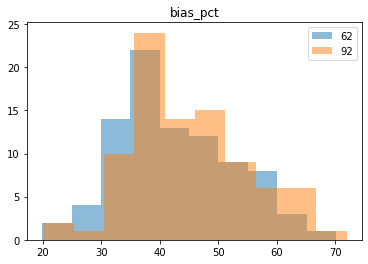

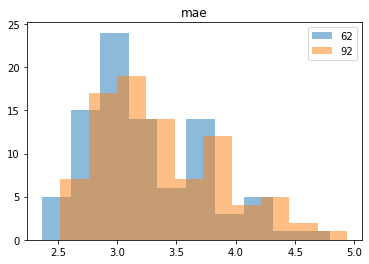

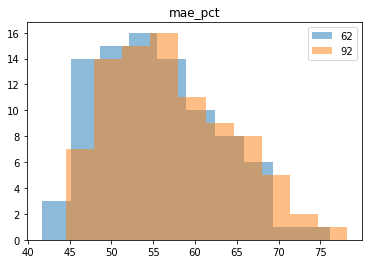

In [200]:
for m in df_metrics_fino.index:
    plot_metric_hist(df_metrics_fino, m)

In [177]:
df_metrics_us

40                    80                   120             \
              dw2km      dw3km      dw2km      dw3km      dw2km      dw3km   
           dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   
rmse       3.240010   3.033471   3.364878   3.155523   3.353622   3.197650   
crmse      2.318738   2.167166   2.474001   2.262455   2.593468   2.365471   
bias      -2.262990  -2.122577  -2.280729  -2.199687  -2.126196  -2.151630   
bias_pct -36.960101 -34.579068 -35.832912 -34.122847 -25.671608 -25.438930   
mae        2.480103   2.359072   2.601562   2.448021   2.578804   2.479674   
mae_pct   47.608359  45.735662  46.069377  43.499233  46.191457  45.868627   

                 40                                   ...         120  \
              meso1      meso2      meso3      meso4  ...    weprog66   
           meso1_ws   meso2_ws   meso3_ws   meso4_ws  ... weprog66_ws   
rmse       2.096215   2.123497   2.173146   2.164018  ...    2.038596   
crmse      1.946613   1.970466   1.998673   1.998781  ...    1.849862   
bias      -0.777699  -0.791521  -0.853155  -0.829366  ...   -0.856671   
bias_pct  -4.430783  -8.078842  -9.575845  -7.802326  ...   -4.821593   
mae        1.607864   1.620689   1.685233   1.683062  ...    1.640720   
mae_pct   34.582046  34.133127  36.725201  36.889527  ...   37.383632   

                                                                      \
            weprog67    weprog68    weprog69    weprog70    weprog71   
         weprog67_ws weprog68_ws weprog69_ws weprog70_ws weprog71_ws   
rmse        2.155882    2.879680    2.522716    2.275912    2.061134   
crmse       1.706472    2.360287    1.946456    1.736073    2.050763   
bias       -1.317491   -1.649729   -1.604807   -1.471675   -0.206507   
bias_pct   -1.208147   13.101490  -19.029340   -2.720919   -3.606393   
mae         1.805222    2.128393    1.973844    1.783980    1.656698   
mae_pct    56.058540   68.806533   44.012683   51.468105   35.861041   

                                                          
            weprog72    weprog73    weprog74    weprog75  
         weprog72_ws weprog73_ws weprog74_ws weprog75_ws  
rmse        1.912791    2.541408    2.097641    1.911898  
crmse       1.836851    2.170974    1.987436    1.744778  
bias       -0.533619   -1.321223   -0.670964   -0.781731  
bias_pct    4.255869   15.073260    8.503307    9.530234  
mae         1.520657    1.962463    1.527918    1.534521  
mae_pct    45.814701   69.953028   46.142750   52.256136  

[6 rows x 258 columns]

In [178]:
df_metrics_fino

62                    72                    82             \
             dw0321     dw0400     dw0321     dw0400     dw0321     dw0400   
          dw0321_ws  dw0400_ws  dw0321_ws  dw0400_ws  dw0321_ws  dw0400_ws   
rmse       2.955345   3.371705   3.042856   3.438431   2.962273   3.384893   
crmse      2.149061   2.758834   2.179586   2.779610   2.199241   2.815816   
bias       2.028694   1.938358   2.123294   2.024000   1.984540   1.878478   
bias_pct  38.670469  45.553132  40.340550  47.209574  36.886215  43.324515   
mae        2.443828   2.734239   2.523650   2.794149   2.431187   2.768806   
mae_pct   43.617742  52.795205  45.075487  54.193480  42.029066  51.276813   

                 92                    62             ...          92  \
             dw0321     dw0400      meso1      meso2  ...    weprog66   
          dw0321_ws  dw0400_ws   meso1_ws   meso2_ws  ... weprog66_ws   
rmse       3.039636   3.443262   4.609557   4.754725  ...    3.293623   
crmse      2.189045   2.805418   4.424289   4.567557  ...    2.860031   
bias       2.108902   1.996418   1.293709   1.320921  ...    1.633454   
bias_pct  39.721148  46.372354  36.431797  37.097954  ...   33.672843   
mae        2.518338   2.806925   3.681684   3.812739  ...    2.726192   
mae_pct   44.516741  53.651701  61.647231  63.481994  ...   46.022539   

                                                                      \
            weprog67    weprog68    weprog69    weprog70    weprog71   
         weprog67_ws weprog68_ws weprog69_ws weprog70_ws weprog71_ws   
rmse        4.344339    3.666007    4.859805    3.620163    5.065658   
crmse       3.887327    3.030338    3.777258    2.935428    3.990145   
bias        1.939581    2.063167    3.057782    2.118690    3.120838   
bias_pct   44.728498   36.912935   51.828989   40.093038   61.592642   
mae         3.511818    2.993553    3.841096    2.876329    4.217346   
mae_pct    61.515667   48.788074   61.619277   50.616588   73.239630   

                                                          
            weprog72    weprog73    weprog74    weprog75  
         weprog72_ws weprog73_ws weprog74_ws weprog75_ws  
rmse        3.496568    5.901699    4.021024    4.822039  
crmse       3.222567    3.857574    3.474556    3.786271  
bias        1.356853    4.466449    2.023881    2.986003  
bias_pct   30.949537   71.910972   41.067068   58.758456  
mae         3.004893    4.933929    3.326030    3.654450  
mae_pct    52.438641   78.133378   56.043500   66.894705  

[6 rows x 352 columns]

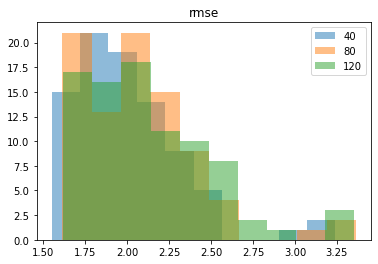

In [76]:
plt.hist(df_metrics['40'].loc[df_metrics.index == 'rmse'].values[0], alpha=0.5, label='40')
plt.hist(df_metrics['80'].loc[df_metrics.index == 'rmse'].values[0], alpha=0.5, label='80')
plt.hist(df_metrics['120'].loc[df_metrics.index == 'rmse'].values[0], alpha=0.5, label='120')
plt.title('rmse')
plt.legend()
plt.show()

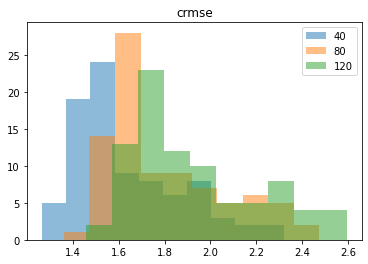

In [77]:
plt.hist(df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0], alpha=0.5, label='40')
plt.hist(df_metrics['80'].loc[df_metrics.index == 'crmse'].values[0], alpha=0.5, label='80')
plt.hist(df_metrics['120'].loc[df_metrics.index == 'crmse'].values[0], alpha=0.5, label='120')
plt.title('crmse')
plt.legend()
plt.show()

In [80]:
df_metrics['40'].loc[df_metrics.index == 'rmse']

,dw2km,dw3km,meso1,meso2,meso3,meso4,meso5,meso6,meso7,meso8,...,weprog66,weprog67,weprog68,weprog69,weprog70,weprog71,weprog72,weprog73,weprog74,weprog75
,dw2km_ws,dw3km_ws,meso1_ws,meso2_ws,meso3_ws,meso4_ws,meso5_ws,meso6_ws,meso7_ws,meso8_ws,...,weprog66_ws,weprog67_ws,weprog68_ws,weprog69_ws,weprog70_ws,weprog71_ws,weprog72_ws,weprog73_ws,weprog74_ws,weprog75_ws
rmse,3.24001,3.033471,2.096215,2.123497,2.173146,2.164018,2.345732,1.76309,2.397622,2.01352,...,1.833918,1.817761,2.226744,2.171372,1.844468,1.793735,1.825933,2.396666,2.08783,1.937554


In [88]:
df_metrics['40'].loc[df_metrics.index == 'crmse']

,dw2km,dw3km,meso1,meso2,meso3,meso4,meso5,meso6,meso7,meso8,...,weprog66,weprog67,weprog68,weprog69,weprog70,weprog71,weprog72,weprog73,weprog74,weprog75
,dw2km_ws,dw3km_ws,meso1_ws,meso2_ws,meso3_ws,meso4_ws,meso5_ws,meso6_ws,meso7_ws,meso8_ws,...,weprog66_ws,weprog67_ws,weprog68_ws,weprog69_ws,weprog70_ws,weprog71_ws,weprog72_ws,weprog73_ws,weprog74_ws,weprog75_ws
crmse,2.318738,2.167166,1.946613,1.970466,1.998673,1.998781,2.24969,1.760383,2.137043,1.867457,...,1.743552,1.498044,1.811212,1.762989,1.414709,1.665377,1.485842,1.837323,1.745924,1.524038


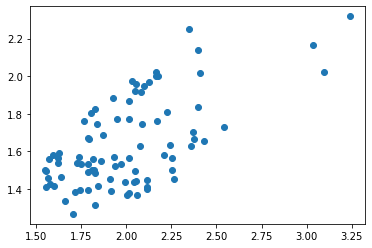

In [98]:
plt.scatter(df_metrics['40'].loc[df_metrics.index == 'rmse'].values[0], 
            df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0])
plt.show()

In [122]:
np.corrcoef(df_metrics['40'].loc[df_metrics.index == 'rmse'].values[0], df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0])[0, 1]

0.6156857351767442

In [100]:
df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0]

array([2.31873773, 2.16716608, 1.94661318, 1.97046557, 1.99867277,
       1.99878094, 2.24969016, 1.76038349, 2.13704293, 1.86745727,
       1.9747124 , 1.39519981, 1.53599445, 1.54983513, 1.49976888,
       1.39315367, 2.02214389, 1.77371071, 1.53153756, 1.66962728,
       1.52981001, 1.9162796 , 1.42504289, 1.41626483, 1.46566567,
       1.53098724, 1.55952728, 1.82346224, 1.49772185, 1.57782337,
       1.45679475, 1.55648353, 1.80247485, 1.53767888, 1.58867346,
       1.50194458, 1.56922186, 1.31326966, 1.45219454, 1.43593736,
       1.37001312, 1.95693111, 1.44504016, 1.58159424, 1.44110934,
       1.39826996, 1.56979903, 1.38592698, 1.62700543, 1.43615383,
       1.36687858, 1.88290213, 1.68661796, 1.56464337, 1.45033289,
       1.26671013, 1.92293861, 1.41112504, 1.49741367, 1.48920794,
       1.33608583, 1.65742223, 1.41028084, 1.72962779, 1.66765538,
       1.49841669, 1.77138218, 1.37643332, 1.70359327, 1.6297651 ,
       1.56362217, 1.56398784, 1.38609551, 2.0160561 , 2.02063

In [108]:
for row in zip(df_metrics.index, df_metrics.index):
    print(row)

('rmse', 'rmse')
('crmse', 'crmse')
('bias', 'bias')
('bias_pct', 'bias_pct')
('mae', 'mae')
('mae_pct', 'mae_pct')


In [165]:
sorted(df_metrics_us.columns.levels[0].astype(int))

[40, 80, 120]

In [172]:
import itertools

for ind, hgt in enumerate(sorted(df_metrics_us.columns.levels[0].astype(int))):
    
    r_dum = pd.DataFrame()

    for pair in list(itertools.combinations(df_metrics_us.index, 2)):
#         print(pair)
#         print(pair[0])

        r = np.corrcoef(df_metrics_us[str(hgt)].loc[df_metrics_us.index == pair[0]].values[0], 
                        df_metrics_us[str(hgt)].loc[df_metrics_us.index == pair[1]].values[0])[0, 1]


        r_dum[pair[0]+'-'+pair[1]] = [r]

#         print(r)

    r_dum.rename({0: hgt}, inplace=True)
    
    print(r_dum)

    print(ind)
    
    if ind == 0: 
        r_summary = r_dum
    else:
        r_summary = r_summary.append(r_dum)

    rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
40    0.615686  -0.697763      -0.495468  0.978753      0.810237    0.005719   

    crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  bias-mae  \
40        0.168306   0.536168       0.626429       0.914887 -0.730432   

    bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
40     -0.369481     -0.563546         -0.214003     0.852666  
0
    rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
80    0.746686  -0.620774      -0.481755  0.977299      0.801928      -0.035   

    crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  bias-mae  \
80        0.029477   0.686741        0.67475       0.906817 -0.652325   

    bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
80     -0.365314     -0.541659          -0.28634     0.855105  
1
     rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
120    0.832182  -0.562612      -0.365543  

In [173]:
r_summary

,rmse-crmse,rmse-bias,rmse-bias_pct,rmse-mae,rmse-mae_pct,crmse-bias,crmse-bias_pct,crmse-mae,crmse-mae_pct,bias-bias_pct,bias-mae,bias-mae_pct,bias_pct-mae,bias_pct-mae_pct,mae-mae_pct
40,0.615686,-0.697763,-0.495468,0.978753,0.810237,0.005719,0.168306,0.536168,0.626429,0.914887,-0.730432,-0.369481,-0.563546,-0.214003,0.852666
80,0.746686,-0.620774,-0.481755,0.977299,0.801928,-0.035000,0.029477,0.686741,0.674750,0.906817,-0.652325,-0.365314,-0.541659,-0.286340,0.855105
120,0.832182,-0.562612,-0.365543,0.973728,0.305362,-0.111806,-0.156983,0.804390,0.199646,0.584322,-0.562872,-0.217377,-0.455366,0.559404,0.251248


In [163]:
r_summary.rename({0: 'total'})

,rmse-crmse,rmse-bias,rmse-bias_pct,rmse-mae,rmse-mae_pct,crmse-bias,crmse-bias_pct,crmse-mae,crmse-mae_pct,bias-bias_pct,bias-mae,bias-mae_pct,bias_pct-mae,bias_pct-mae_pct,mae-mae_pct
total,0.615686,-0.697763,-0.495468,0.978753,0.810237,0.005719,0.168306,0.536168,0.626429,0.914887,-0.730432,-0.369481,-0.563546,-0.214003,0.852666


### 30 min vs 60 min

In [158]:
df_metrics_us_30 = get_metrics_df('us', ['dw', 'meso', 'nrel'])
df_metrics_us_60 = get_metrics_df('us/60min', ['dw', 'meso', 'nrel'])

df_metrics_fino_30 = get_metrics_df('fino', ['dw', 'dtu', 'meso', 'nrel'])
df_metrics_fino_60 = get_metrics_df('fino/60min', ['dw', 'dtu', 'meso', 'nrel'])

In [159]:
df_metrics_us_30

40                    80                   120             \
              dw2km      dw3km      dw2km      dw3km      dw2km      dw3km   
           dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   dw2km_ws   dw3km_ws   
rmse       3.240010   3.033471   3.364878   3.155523   3.353622   3.197650   
crmse      2.318738   2.167166   2.474001   2.262455   2.593468   2.365471   
nrmse      0.595209   0.534723   0.585461   0.509882   0.543515   0.481819   
bias      -2.262990  -2.122577  -2.280729  -2.199687  -2.126196  -2.151630   
bias_pct -36.960101 -34.579068 -35.832912 -34.122847 -25.671608 -25.438930   
mae        2.480103   2.359072   2.601562   2.448021   2.578804   2.479674   
mae_pct   47.608359  45.735662  46.069377  43.499233  46.191457  45.868627   

                 40                                   ...        120  \
              meso1      meso2      meso3      meso4  ...      meso2   
           meso1_ws   meso2_ws   meso3_ws   meso4_ws  ...   meso2_ws   
rmse       2.096215   2.123497   2.173146   2.164018  ...   2.454862   
crmse      1.946613   1.970466   1.998673   1.998781  ...   2.346489   
nrmse      0.408877   0.418767   0.435075   0.430583  ...   0.428375   
bias      -0.777699  -0.791521  -0.853155  -0.829366  ...  -0.721344   
bias_pct  -4.430783  -8.078842  -9.575845  -7.802326  ... -11.967565   
mae        1.607864   1.620689   1.685233   1.683062  ...   1.899133   
mae_pct   34.582046  34.133127  36.725201  36.889527  ...  32.425942   

                                                                            \
              meso3      meso4      meso5      meso6      meso7      meso8   
           meso3_ws   meso4_ws   meso5_ws   meso6_ws   meso7_ws   meso8_ws   
rmse       2.510902   2.525964   2.531131   1.817847   2.774149   2.331547   
crmse      2.344036   2.365960   2.421273   1.812444   2.528783   2.256735   
nrmse      0.448190   0.448248   0.419450   0.298086   0.499497   0.403246   
bias      -0.900070  -0.884719  -0.737605  -0.140054  -1.140684  -0.585882   
bias_pct -17.381314 -15.966122   2.111305  -2.491020 -17.691522  -5.043878   
mae        1.935363   1.930802   2.032431   1.454014   2.186242   1.789778   
mae_pct   32.660390  31.972891  42.223683  25.868035  36.923527  35.992735   

                  40          80         120  
                nrel        nrel        nrel  
         nrel_wrf_ws nrel_wrf_ws nrel_wrf_ws  
rmse        2.029357    2.358338    2.626287  
crmse       1.974712    2.274215    2.535024  
nrmse       0.353038    0.353090    0.358035  
bias        0.467761    0.624263    0.686322  
bias_pct   16.822186   12.701559   15.104828  
mae         1.550987    1.752744    1.938592  
mae_pct    36.889154   33.156328   37.869157  

[7 rows x 33 columns]

In [160]:
def plot_metric_2hist(df1, df2, metric): 
    
    hgt_list = sorted(df1.columns.levels[0].astype(int))
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[-1]
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
    
    for hgt in hgt_list: 
    
#     plt.hist(df['40'].loc[df.index == metric].values[0], alpha=0.5, label='40')
#     plt.hist(df['80'].loc[df.index == metric].values[0], alpha=0.5, label='80')
#     plt.hist(df['120'].loc[df.index == metric].values[0], alpha=0.5, label='120')

        ax1.hist(df1[str(hgt)].loc[df1.index == metric].values[0], alpha=0.5, label=str(hgt))
        ax2.hist(df2[str(hgt)].loc[df2.index == metric].values[0], alpha=0.5, label=str(hgt))
    
#     x_min = np.min(plt.getp(ax1, 'xlim')[0], plt.getp(ax2, 'xlim')[0])
#     x_max = np.max(plt.getp(ax1, 'xlim')[-1], plt.getp(ax2, 'xlim')[-1])
    
#     y_min = np.min(plt.getp(ax1, 'ylim')[0], plt.getp(ax2, 'ylim')[0])
#     y_max = np.max(plt.getp(ax1, 'ylim')[-1], plt.getp(ax2, 'ylim')[-1])
        
#     ax1.set_xlim()
        
    ax1.set_title(metric+' 30 min avg')
    ax2.set_title(metric+' 60 min avg')
    
    ax1.legend()
    ax2.legend()
    
    plt.show()

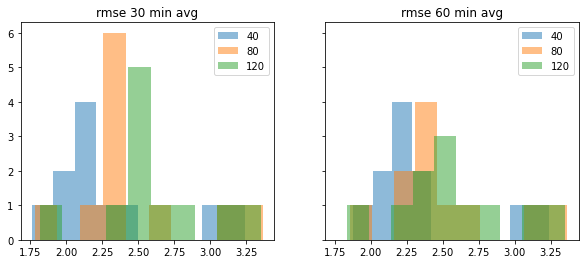

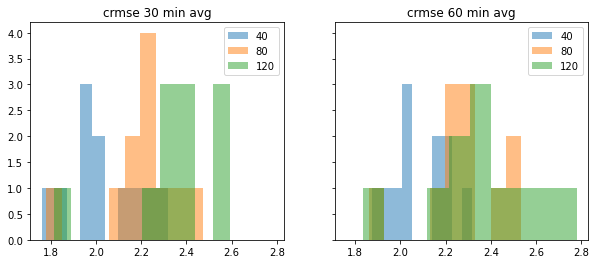

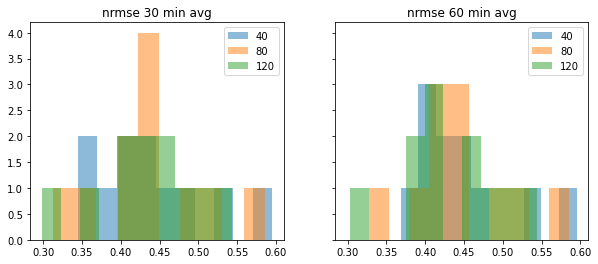

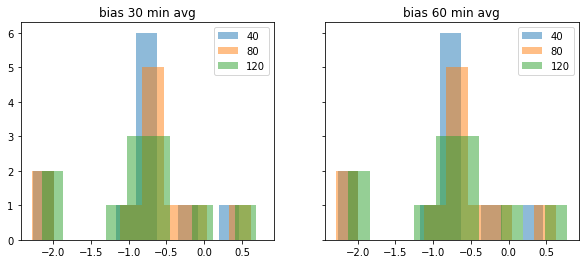

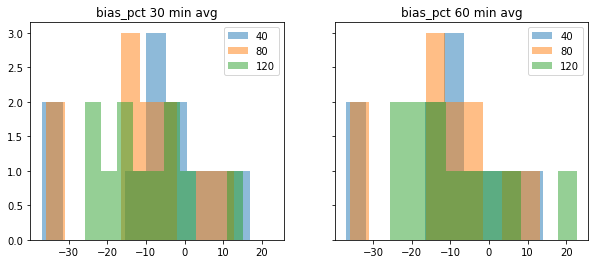

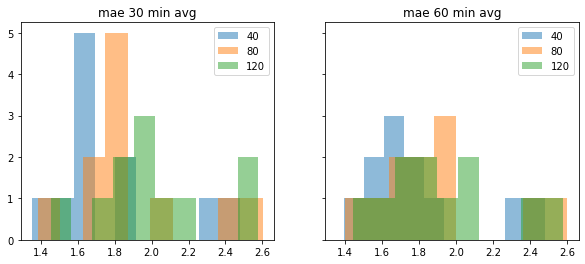

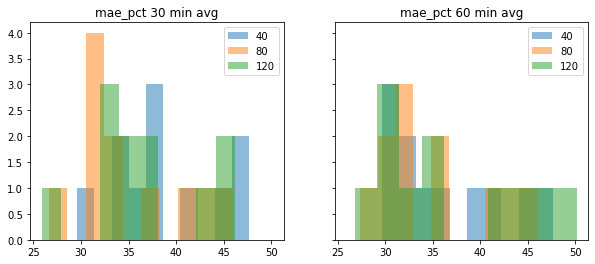

In [161]:
for m in df_metrics_us_30.index:
    plot_metric_2hist(df_metrics_us_30, df_metrics_us_60, m)

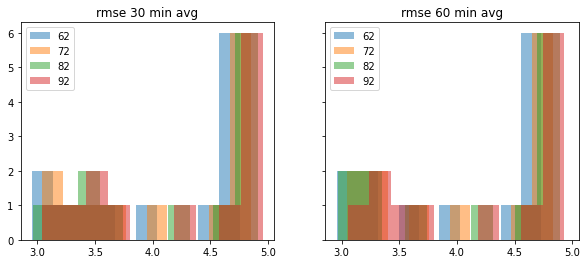

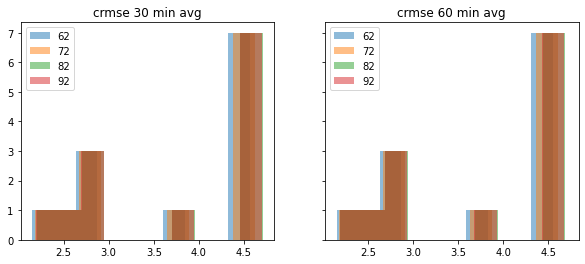

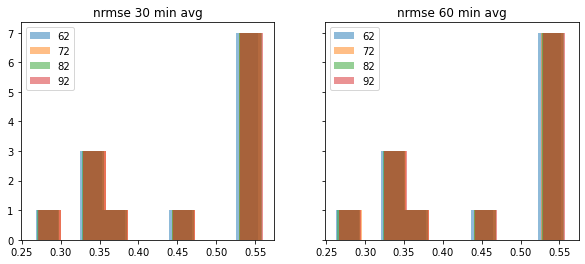

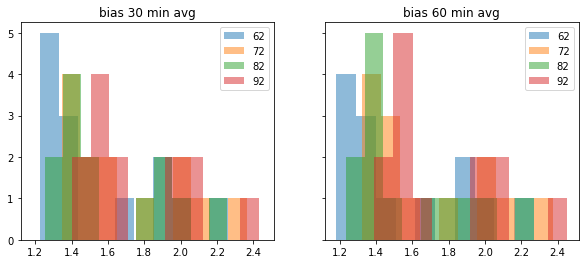

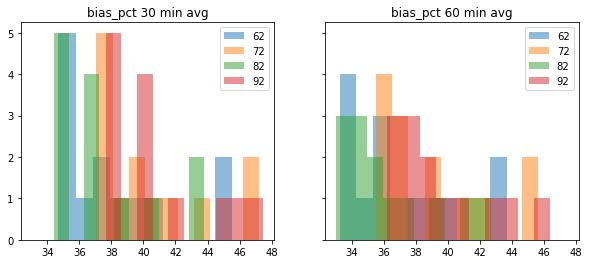

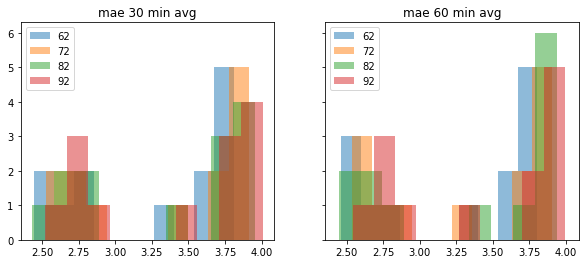

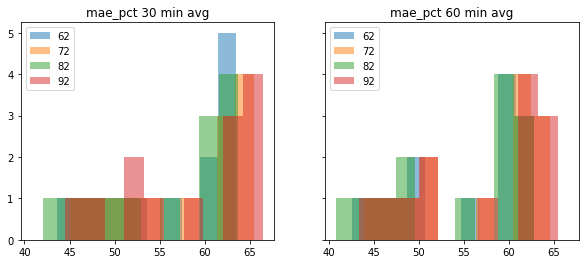

In [162]:
for m in df_metrics_fino_30.index:
    plot_metric_2hist(df_metrics_fino_30, df_metrics_fino_60, m)

## Ramps

In [52]:
def get_2x2_allramps_plot(case, lev):

    lev = str(lev)
    
    rdf = get_rampdf(case, 4)
    
    inds = ['true_positive', 'false_positive', 'false_negative', 'true_negative']
    
    rdf_2x2 = rdf.loc(axis=1)[lev, :, :, 'all', : ,:].loc[inds]

    rdf_2x2 = rdf_2x2.xs('all', level=3, axis=1, drop_level=True)
    
    rdf_pct = 100*rdf_2x2/rdf_2x2.sum()
    
    srdf = rdf_pct.T
    srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)
    p_srdf = srdf.pivot_table(index='t4', columns='t3')
    
    plot_2x2(p_srdf, srdf, plot_allramps_contin_legend, 
             case+' case: 2x2 contingency table percentage at '+lev+' m')
    
#     return srdf
    
def get_rampdf(case, head_num):

    file_list = glob.glob(main_dir+'output/'+case+'/ramp_*.csv')
    rdf = pd.DataFrame()
    
    for idx, file in enumerate(file_list):
        
        rdf_file = pd.read_csv(file, header=list(range(0, head_num+1)), index_col=[0])
        
        if idx == 0:
            rdf = rdf_file
        else:
            rdf = rdf.join(rdf_file)
            
    return rdf

def plot_2x2(ps_df, s_df, legend, title_txt, log=False):
    
    m = len(ps_df.columns) // 4
    n = len(ps_df)
    values = [ps_df.sort_index(axis=1)[col] for col in s_df.columns]  # these are the 4 column names in df

    triangul = triangulation_for_triheatmap(m, n)
    cmaps = ['viridis'] * 4
    if log is False:
        norms = [plt.Normalize(ps_df.min().min(), ps_df.max().max()) for _ in range(4)]
    elif log is True: 
        # log(0) is nan and crashes plotting code
        ps_df.replace(0, 1, inplace=True)
        norms = [colors.LogNorm(ps_df.min().min(), ps_df.max().max()) for _ in range(4)]
#     print(ps_df.min().min(), ps_df.max().max())
        
    legend(s_df.columns)
    
#     fig, (axl, ax) = plt.subplots(2, 1, figsize=(10, 4), gridspec_kw={'height_ratios': [1, 3]})
    fig, ax = plt.subplots(figsize=(10, 4))

    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
            for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]
    # imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, ec='white')
    #         for t, val, cmap in zip(triangul, values, cmaps)]

    ax.tick_params(length=0)
    ax.set_xticks(range(m))
    ax.set_xticklabels(sorted(s_df.index.get_level_values(2).unique()), rotation=90)
    ax.set_yticks(range(n))
    ax.set_yticklabels(ps_df.index)
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.colorbar(imgs[3], ax=ax)
    ax.set_title(title_txt, pad=8)
    
    plt.tight_layout()
    plt.show()
    
def triangulation_for_triheatmap(m, n):
    
    xv, yv = np.meshgrid(np.arange(-0.5, m), np.arange(-0.5, n))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, m), np.arange(0, n))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (m+1)*(n+1)  # indices of the centers

    triangles_top = [(i+j * (m+1), i+1+j * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_right = [(i+1+j * (m+1), i+1+(j+1) * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_bot = [(i+1+(j+1) * (m+1), i+(j+1) * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_left = [(i+(j+1) * (m+1), i+j * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    
    return [Triangulation(x, y, triangles) 
            for triangles in [triangles_top, triangles_right, triangles_bot, triangles_left]]
    
def plot_allramps_contin_legend(txt_list):

    fig, ax = plt.subplots(figsize=(12, 1))

    ax.plot((0, 0, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0), c='k')

    ax.set_xlim(-7, 7)
    ax.text(-1.55, 0.4, txt_list[3], c='k')
    ax.text(-0.2, 1.2, txt_list[0], c='k')
    ax.text(1.2, 0.4, txt_list[1], c='k')
    ax.text(-0.3, -0.35, txt_list[2], c='k')

    ax.axis(False)

    plt.show()

In [59]:
def get_2x2_updownramps_plot(case, lev, updown):

    lev = str(lev)

    rdf = get_rampdf(case, 4)

    inds = ['true_positive', 'false_positive', 'false_negative', 'base_ramp', 'critical_success_index']

    rdf_2x2 = rdf.loc(axis=1)[lev, :, :, updown, :, :].loc[inds]

    rdf_2x2 = rdf_2x2.xs(updown, level=3, axis=1, drop_level=True)

    rdf_pct = 100*rdf_2x2/rdf_2x2.loc['base_ramp']

    rdf_pct.loc['critical_success_index'] = rdf_2x2.loc['critical_success_index']*100

    rdf_pct.drop(['base_ramp'], axis=0, inplace=True)

    srdf = rdf_pct.T
    srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)
    p_srdf = srdf.pivot_table(index='t4', columns='t3')

    plot_2x2(p_srdf, srdf, plot_updownramps_contin_legend, 
             case+' case '+updown+' ramps: parameter percentage\n(divided by baseline ramp number) at '+lev+' m', log=True)
    
#     return srdf
    
def plot_updownramps_contin_legend(txt_list):

    fig, ax = plt.subplots(figsize=(12, 1))

    ax.plot((0, 0, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0), c='k')

    ax.set_xlim(-7, 7)
    ax.text(-2.45, 0.4, txt_list[3], c='k')
    ax.text(-0.2, 1.2, txt_list[0], c='k')
    ax.text(1.2, 0.4, txt_list[1], c='k')
    ax.text(-0.3, -0.35, txt_list[2], c='k')

    ax.axis(False)

    plt.show()

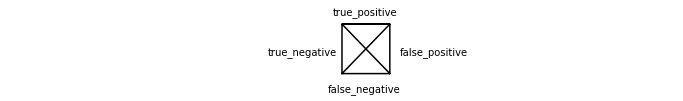

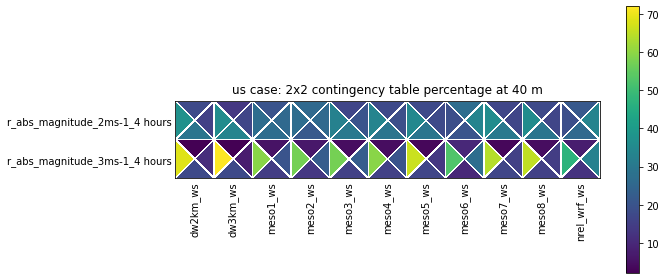

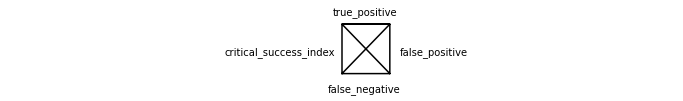

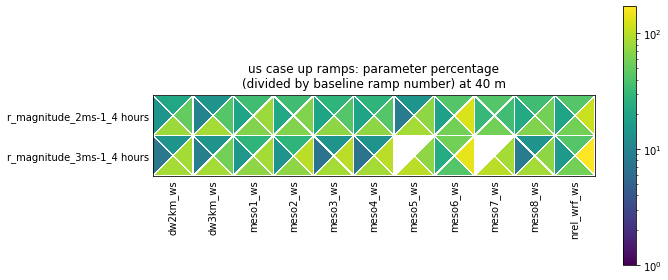

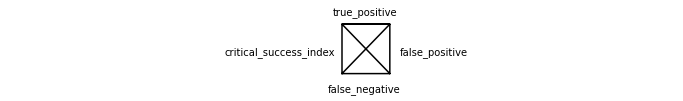

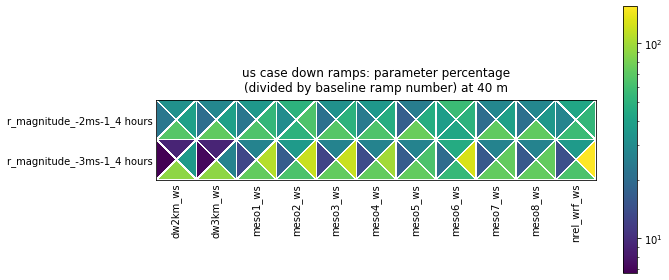

In [61]:
get_2x2_allramps_plot('us', 40)
get_2x2_updownramps_plot('us', 40, 'up')
get_2x2_updownramps_plot('us', 40, 'down')
# get_2x2_allramps_plot('us', 80)
# get_2x2_allramps_plot('us', 120)

5.182926829268292 69.8170731707317


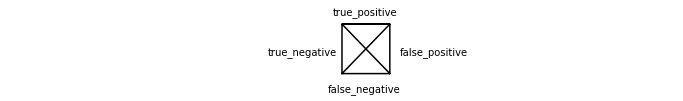

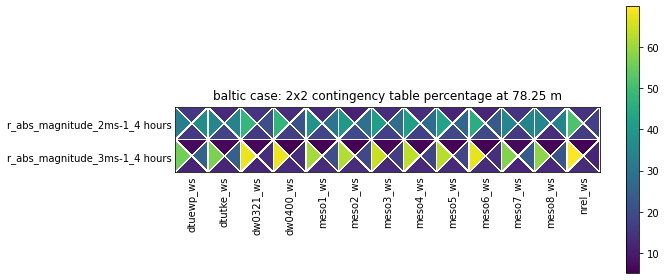

In [30]:
get_2x2_allramps_plot('baltic', 78.25)

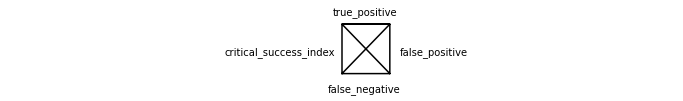

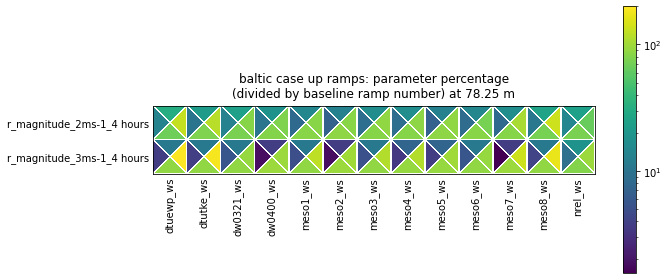

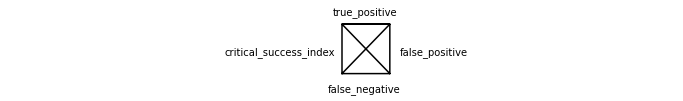

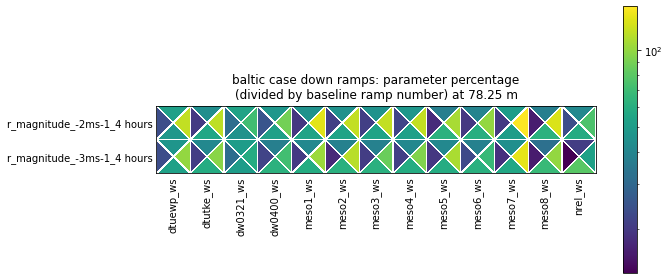

In [20]:
lev = 78.25
case = 'baltic'
get_2x2_updownramps_plot(case, lev, 'up')
get_2x2_updownramps_plot(case, lev, 'down')

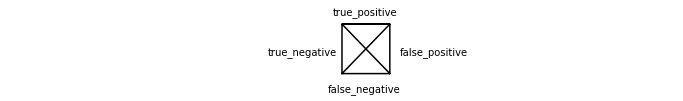

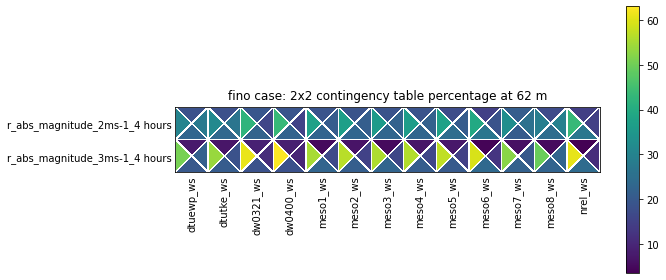

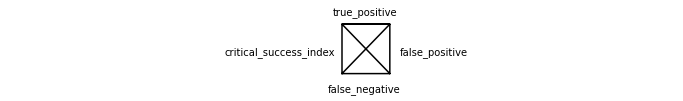

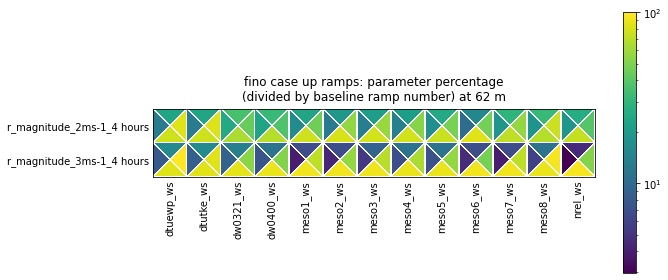

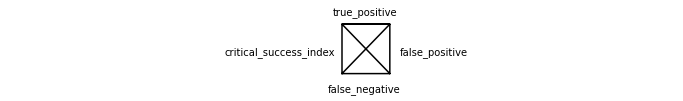

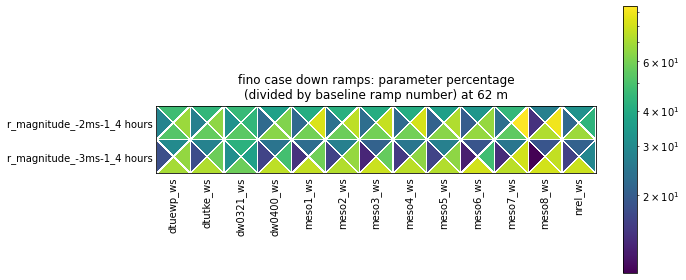

In [55]:
get_2x2_allramps_plot('fino', 62)
get_2x2_updownramps_plot('fino', 62, 'up')
get_2x2_updownramps_plot('fino', 62, 'down')
# get_2x2_plot('fino', 72)
# get_2x2_plot('fino', 82)
# get_2x2_plot('fino', 92)

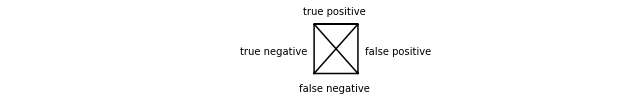

In [87]:
plot_contin_legend()

In [44]:
rdf_pct

40                            \
                                   dw2km                             
                                dw2km_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  14.606742                  3.370787   
false_positive                 19.101124                 10.112360   
false_negative                 28.089888                 16.853933   
true_negative                  38.202247                 69.662921   

                                                                    \
                                   dw3km                             
                                dw3km_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  10.112360                  3.370787   
false_positive                 20.224719                  6.741573   
false_negative                 32.584270                 16.853933   
true_negative                  37.078652                 73.033708   

                                                                    \
                                   meso1                             
                                meso1_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  17.977528                  7.865169   
false_positive                 28.089888                 17.977528   
false_negative                 24.719101                 12.359551   
true_negative                  29.213483                 61.797753   

                                                                    \
                                   meso2                             
                                meso2_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  25.842697                  6.741573   
false_positive                 25.842697                 22.471910   
false_negative                 16.853933                 13.483146   
true_negative                  31.460674                 57.303371   

                                                                    ...  \
                                   meso3                            ...   
                                meso3_ws                            ...   
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours  ...   
true_positive                  13.483146                  6.741573  ...   
false_positive                 23.595506                 20.224719  ...   
false_negative                 29.213483                 13.483146  ...   
true_negative                  33.707865                 59.550562  ...   

                                                                    \
                                   meso5                             
                                meso5_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  14.606742                  5.617978   
false_positive                 21.348315                 11.235955   
false_negative                 28.089888                 14.606742   
true_negative                  35.955056                 68.539326   

                                                                    \
                                   meso6                             
                                meso6_ws                             
               r_magnitude_2ms-1_4 hours r_magnitude_3ms-1_4 hours   
true_positive                  25.842697                 10.112360   
false_positive                 34.831461                 26.966292   
false_negative                 16.853933                 10.112360   
true_negative                  22.471910                 52.808989   

                                                                    \
 

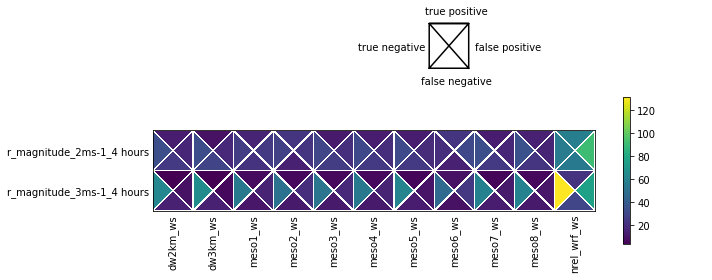

In [70]:
m = len(p_srdf.columns) // 4
n = len(p_srdf)
values = [p_srdf[dir] for dir in
          srdf.columns]  # these are the 4 column names in df

triangul = triangulation_for_triheatmap(m, n)
cmaps = ['viridis'] * 4
norms = [plt.Normalize(p_srdf.min().min(), p_srdf.max().max()) for _ in range(4)]

fig, (axl, ax) = plt.subplots(2, 1, figsize=(10, 4), gridspec_kw={'height_ratios': [1, 3]})

imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]
# imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, ec='white')
#         for t, val, cmap in zip(triangul, values, cmaps)]

ax.tick_params(length=0)
ax.set_xticks(range(m))
ax.set_xticklabels(srdf.index.get_level_values(2).unique(), rotation=90)
ax.set_yticks(range(n))
ax.set_yticklabels(p_srdf.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
plt.colorbar(imgs[3], ax=ax)

# axl.plot((1, 9), (1, 9), c='k', transform=ax.transAxes)
axl.plot((0, 0, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0), c='k')
# axl.plot((0, 1), (0, 1), c='k')
# axl.plot((0, 1), (1, 0), c='k')
axl.set_xlim(-7, 7)
axl.text(-1.8, 0.4, 'true negative', c='k')
axl.text(-0.1, 1.2, 'true positive', c='k')
axl.text(1.15, 0.4, 'false positive', c='k')
axl.text(-0.2, -0.35, 'false negative', c='k')

# axl.text(0.05, 1.3, 'true negative', c='k', transform=ax.transAxes)
# axl.text(0.6, 1.3, 'false positive', c='k', transform=ax.transAxes)
# axl.text(0.35, 1.05, 'false negative', c='k', transform=ax.transAxes)
# axl.text(0.35, 1.6, 'true positive', c='k', transform=ax.transAxes)
axl.axis(False)

# ax.plot((1.8, 0.5), (1.8, 0.8), c='k', transform = ax.transAxes)

plt.tight_layout()
plt.show()

In [6]:
p_srdf

false_negative                               \
t3                              dw2km_ws dw3km_ws meso_ws nrel_wrf_ws   
t4                                                                      
r_magnitude_2ms-1_4 hours           25.0     29.0    22.0        55.0   
r_magnitude_3ms-1_4 hours           15.0     15.0    11.0        30.0   

                          false_positive                               \
t3                              dw2km_ws dw3km_ws meso_ws nrel_wrf_ws   
t4                                                                      
r_magnitude_2ms-1_4 hours           17.0     18.0    25.0        92.0   
r_magnitude_3ms-1_4 hours            9.0      6.0    16.0        77.0   

                          true_negative                               \
t3                             dw2km_ws dw3km_ws meso_ws nrel_wrf_ws   
t4                                                                     
r_magnitude_2ms-1_4 hours          34.0     33.0    26.0        56.0   
r_magnitude_3ms-1_4 hours          62.0     65.0    55.0       132.0   

                          true_positive                               
t3                             dw2km_ws dw3km_ws meso_ws nrel_wrf_ws  
t4                                                                    
r_magnitude_2ms-1_4 hours          13.0      9.0    16.0        58.0  
r_magnitude_3ms-1_4 hours           3.0      3.0     7.0        22.0

In [5]:
rdf['40']['dw2km']['dw2km_ws']['r_magnitude_2ms-1_4 hours']

true_positive               13.000000
false_positive              17.000000
false_negative              25.000000
true_negative               34.000000
probability_of_detection     0.342105
critical_success_index       0.236364
frequency_bias_score         0.789474
false_alarm_ratio            0.566667
forecast_accuracy            0.433333
Name: r_magnitude_2ms-1_4 hours, dtype: float64

In [6]:
srdf = rdf.loc(axis=1)['40', : , :, :][:4].T
srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)
srdf

true_positive  false_positive  \
t1 t2    t3       t4                                                         
40 dw2km dw2km_ws r_magnitude_2ms-1_4 hours           13.0            17.0   
                  r_magnitude_3ms-1_4 hours            3.0             9.0   
   dw3km dw3km_ws r_magnitude_2ms-1_4 hours            9.0            18.0   
                  r_magnitude_3ms-1_4 hours            3.0             6.0   
   meso  meso_ws  r_magnitude_2ms-1_4 hours           16.0            25.0   
                  r_magnitude_3ms-1_4 hours            7.0            16.0   

                                             false_negative  true_negative  
t1 t2    t3       t4                                                        
40 dw2km dw2km_ws r_magnitude_2ms-1_4 hours            25.0           34.0  
                  r_magnitude_3ms-1_4 hours            15.0           62.0  
   dw3km dw3km_ws r_magnitude_2ms-1_4 hours            29.0           33.0  
                  r_magnitude_3ms-1_4 hours            15.0           65.0  
   meso  meso_ws  r_magnitude_2ms-1_4 hours            22.0           26.0  
                  r_magnitude_3ms-1_4 hours            11.0           55.0

In [7]:
p_srdf = srdf.pivot_table(index='t4', columns='t3')
p_srdf

false_negative                  false_positive  \
t3                              dw2km_ws dw3km_ws meso_ws       dw2km_ws   
t4                                                                         
r_magnitude_2ms-1_4 hours           25.0     29.0    22.0           17.0   
r_magnitude_3ms-1_4 hours           15.0     15.0    11.0            9.0   

                                           true_negative                   \
t3                        dw3km_ws meso_ws      dw2km_ws dw3km_ws meso_ws   
t4                                                                          
r_magnitude_2ms-1_4 hours     18.0    25.0          34.0     33.0    26.0   
r_magnitude_3ms-1_4 hours      6.0    16.0          62.0     65.0    55.0   

                          true_positive                   
t3                             dw2km_ws dw3km_ws meso_ws  
t4                                                        
r_magnitude_2ms-1_4 hours          13.0      9.0    16.0  
r_magnitude_3ms-1_4 hours           3.0      3.0     7.0

In [27]:
p_srdf.max().max()

65.0

In [28]:
p_srdf.min().min()

3.0

In [8]:
M = len(p_srdf.columns) // 4
N = len(p_srdf)
values = [p_srdf[dir] for dir in
          srdf.columns]  # these are the 4 column names in df

In [20]:
values

[t3                         dw2km_ws  dw3km_ws  meso_ws
 t4                                                    
 r_magnitude_2ms-1_4 hours      13.0       9.0     16.0
 r_magnitude_3ms-1_4 hours       3.0       3.0      7.0,
 t3                         dw2km_ws  dw3km_ws  meso_ws
 t4                                                    
 r_magnitude_2ms-1_4 hours      17.0      18.0     25.0
 r_magnitude_3ms-1_4 hours       9.0       6.0     16.0,
 t3                         dw2km_ws  dw3km_ws  meso_ws
 t4                                                    
 r_magnitude_2ms-1_4 hours      25.0      29.0     22.0
 r_magnitude_3ms-1_4 hours      15.0      15.0     11.0,
 t3                         dw2km_ws  dw3km_ws  meso_ws
 t4                                                    
 r_magnitude_2ms-1_4 hours      34.0      33.0     26.0
 r_magnitude_3ms-1_4 hours      62.0      65.0     55.0]

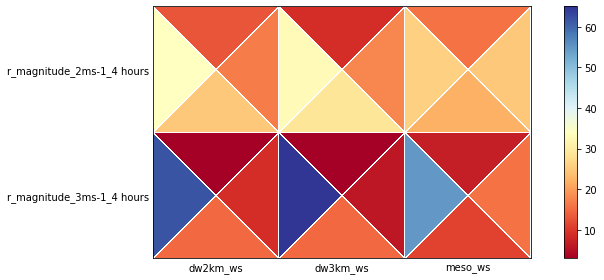

In [29]:
# M = len(p_srdf.columns) // 4
# N = len(p_srdf)
# values = [p_srdf[dir] for dir in
#           srdf.columns]  # these are the 4 column names in df

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['RdYlBu'] * 4
norms = [plt.Normalize(p_srdf.min().min(), p_srdf.max().max()) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10, 4))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]
# imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, ec='white')
#         for t, val, cmap in zip(triangul, values, cmaps)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(srdf.index.get_level_values(2).unique())
ax.set_yticks(range(N))
ax.set_yticklabels(p_srdf.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
plt.colorbar(imgs[3], ax=ax)
plt.tight_layout()
plt.show()

In [113]:
p_srdf

false_negative                  false_positive  \
t3                              dw2km_ws dw3km_ws meso_ws       dw2km_ws   
t4                                                                         
r_magnitude_2ms-1_4 hours           25.0     29.0    22.0           17.0   
r_magnitude_3ms-1_4 hours           15.0     15.0    11.0            9.0   

                                           true_negative                   \
t3                        dw3km_ws meso_ws      dw2km_ws dw3km_ws meso_ws   
t4                                                                          
r_magnitude_2ms-1_4 hours     18.0    25.0          34.0     33.0    26.0   
r_magnitude_3ms-1_4 hours      6.0    16.0          62.0     65.0    55.0   

                          true_positive                   
t3                             dw2km_ws dw3km_ws meso_ws  
t4                                                        
r_magnitude_2ms-1_4 hours          13.0      9.0    16.0  
r_magnitude_3ms-1_4 hours           3.0      3.0     7.0

In [65]:
rdf.loc(axis=1)['40', : , :, :][:4].T.columns

Index(['true_positive', 'false_positive', 'false_negative', 'true_negative'], dtype='object')

In [67]:
rdf.loc(axis=1)['40', : , :, :][:4].T.index

MultiIndex([('40', 'dw2km', 'dw2km_ws', 'r_magnitude_2ms-1_4 hours'),
            ('40', 'dw2km', 'dw2km_ws', 'r_magnitude_3ms-1_4 hours'),
            ('40', 'dw3km', 'dw3km_ws', 'r_magnitude_2ms-1_4 hours'),
            ('40', 'dw3km', 'dw3km_ws', 'r_magnitude_3ms-1_4 hours'),
            ('40',  'meso',  'meso_ws', 'r_magnitude_2ms-1_4 hours'),
            ('40',  'meso',  'meso_ws', 'r_magnitude_3ms-1_4 hours')],
           )

In [75]:
srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)

In [76]:
srdf.index.get_level_values(0)

Index(['40', '40', '40', '40', '40', '40'], dtype='object', name='t1')

In [71]:
srdf.pivot_table(index='level1')

KeyError: 'level1'

In [ ]:
df_piv = df.pivot_table(index='rows', columns='cols')

In [64]:
df.columns

Index(['cols', 'rows', 'north', 'east', 'south', 'west'], dtype='object')

In [54]:
df

,cols,rows,north,east,south,west
0,h,Fri,0.051642,0.033197,0.298103,0.028917
1,g,Thu,0.058756,0.468158,0.314536,0.114135
2,f,Tue,0.271725,0.780174,0.307855,0.138555
3,j,Fri,0.417720,0.405453,0.903613,0.378651
4,i,Tue,0.169375,0.563734,0.336128,0.870945
5,e,Tue,0.964234,0.387148,0.916675,0.146984
6,g,Thu,0.751938,0.608342,0.692106,0.361135
7,j,Fri,0.529482,0.141763,0.713343,0.237405
8,g,Thu,0.728243,0.233336,0.105105,0.776263
9,g,Wed,0.060980,0.085120,0.517860,0.165905


In [53]:
df_piv

east                                                              \
cols         a         b         c         d         e         f         g   
rows                                                                         
Mon   0.642677  0.236812       NaN       NaN  0.672720  0.530699  0.882173   
Tue   0.572020       NaN  0.620456  0.774746  0.381096       NaN       NaN   
Wed   0.799041  0.486874       NaN       NaN  0.538312       NaN  0.226859   
Thu   0.646024  0.585428  0.115686  0.287900       NaN  0.582402  0.553035   
Fri        NaN  0.678439  0.609984  0.612498       NaN  0.250010  0.584306   

                                    ...      west                      \
cols         h         i         j  ...         a         b         c   
rows                                ...                                 
Mon   0.170828       NaN       NaN  ...  0.503376  0.721817       NaN   
Tue        NaN  0.607236       NaN  ...  0.464243       NaN  0.035659   
Wed        NaN       NaN       NaN  ...  0.647487  0.494837       NaN   
Thu   0.674968  0.417233       NaN  ...  0.750955  0.043111  0.269935   
Fri   0.690357  0.682419  0.107392  ...       NaN  0.912974  0.681874   

                                                                            
cols         d         e         f         g         h         i         j  
rows                                                                        
Mon        NaN  0.647135  0.627667  0.846230  0.506537       NaN       NaN  
Tue   0.412505  0.073849       NaN       NaN       NaN  0.996135       NaN  
Wed        NaN  0.507857       NaN  0.100181       NaN       NaN       NaN  
Thu   0.230988       NaN  0.844105  0.470199  0.480377  0.111964       NaN  
Fri   0.652258       NaN  0.498647  0.267053  0.444233  0.754874  0.921554  

[5 rows x 40 columns]

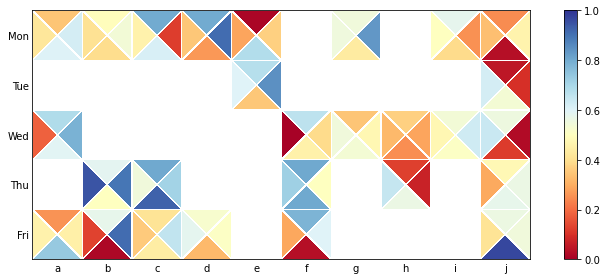

In [99]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
df = pd.DataFrame({'cols': np.random.choice([*'abcdefghij'], 40),
                   'rows': np.random.choice(days, 40),
                   'north': np.random.rand(40),
                   'east': np.random.rand(40),
                   'south': np.random.rand(40),
                   'west': np.random.rand(40)})
df['rows'] = pd.Categorical(df['rows'], categories=days)  # fix an ordering
df_piv = df.pivot_table(index='rows', columns='cols')
M = len(df_piv.columns) // 4
N = len(df_piv)
values = [df_piv[dir] for dir in
          ['north', 'east', 'south', 'west']]  # these are the 4 column names in df

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['RdYlBu'] * 4
norms = [plt.Normalize(0, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10, 4))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(df_piv['north'].columns)
ax.set_yticks(range(N))
ax.set_yticklabels(df_piv.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
plt.colorbar(imgs[0], ax=ax)
plt.tight_layout()
plt.show()

In [101]:
df_piv

east                                                              \
cols         a         b         c         d         e         f         g   
rows                                                                         
Mon   0.624433  0.542296  0.122082  0.913472  0.367647       NaN  0.837058   
Tue        NaN       NaN       NaN       NaN  0.850536       NaN       NaN   
Wed   0.785477       NaN       NaN       NaN       NaN  0.391732  0.475194   
Thu        NaN  0.894544  0.714256       NaN       NaN  0.500946       NaN   
Fri   0.450639  0.912537  0.659316  0.510254       NaN  0.600033       NaN   

                                    ...      west                      \
cols         h         i         j  ...         a         b         c   
rows                                ...                                 
Mon        NaN  0.256062  0.463154  ...  0.423500  0.406969  0.459164   
Tue        NaN       NaN  0.098067  ...       NaN       NaN       NaN   
Wed   0.286137  0.631778  0.026776  ...  0.180689       NaN       NaN   
Thu   0.072264       NaN  0.564254  ...       NaN  0.952044  0.547721   
Fri        NaN       NaN  0.548225  ...  0.457398  0.132284  0.356262   

                                                                            
cols         d         e         f         g         h         i         j  
rows                                                                        
Mon   0.348544  0.285866       NaN  0.554311       NaN  0.503543  0.335839  
Tue        NaN  0.599635       NaN       NaN       NaN       NaN  0.621227  
Wed        NaN       NaN  0.006369  0.547594  0.321301  0.473339  0.643317  
Thu        NaN       NaN  0.720126       NaN  0.651567       NaN  0.293736  
Fri   0.585067       NaN  0.290821       NaN       NaN       NaN  0.411712  

[5 rows x 40 columns]

In [100]:
values

[cols         a         b         c         d         e         f         g  \
 rows                                                                         
 Mon   0.346107  0.494976  0.804414  0.801373  0.015220       NaN  0.548690   
 Tue        NaN       NaN       NaN       NaN  0.678792       NaN       NaN   
 Wed   0.690750       NaN       NaN       NaN       NaN  0.666744  0.346081   
 Thu        NaN  0.587703  0.806598       NaN       NaN  0.805035       NaN   
 Fri   0.259934  0.576884  0.410527  0.524066       NaN  0.783398       NaN   
 
 cols         h         i         j  
 rows                                
 Mon        NaN  0.579769  0.247584  
 Tue        NaN       NaN  0.050587  
 Wed   0.369284  0.541180  0.557641  
 Thu   0.126036       NaN  0.477080  
 Fri        NaN       NaN  0.562118  ,
 cols         a         b         c         d         e         f         g  \
 rows                                                                         
 Mon   0.624433  0.5

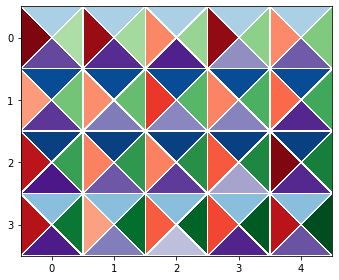

In [96]:
from matplotlib.tri import Triangulation
import numpy as np

def create_demo_data(M, N):
    # create some demo data for North, East, South, West
    # note that each of the 4 arrays can be either 2D (N by M) or 1D (N*M)
    # M columns and N rows
    valuesN = np.repeat(np.abs(np.sin(np.arange(N))), M)
    valuesE = np.arange(M * N) / (N * M)
    valuesS = np.random.uniform(0, 1, (N, M))
    valuesW = np.random.uniform(0, 1, (N, M))
    return [valuesN, valuesE, valuesS, valuesW]

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

M, N = 5, 4  # e.g. 5 columns, 4 rows
values = create_demo_data(M, N)
triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots()
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.set_xticks(range(M))
ax.set_yticks(range(N))
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
plt.tight_layout()
plt.show()

In [95]:
imgs = [ax.tripcolor(t, val.ravel(), cmap='RdYlGn', vmin=0, vmax=1, ec='white')
        for t, val in zip(triangul, values)]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
cbar = fig.colorbar(imgs[0], ax=ax)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [16]:
df_piv

east                                                              \
cols         a         b         c         d         e         f         g   
rows                                                                         
Mon   0.642677  0.236812       NaN       NaN  0.672720  0.530699  0.882173   
Tue   0.572020       NaN  0.620456  0.774746  0.381096       NaN       NaN   
Wed   0.799041  0.486874       NaN       NaN  0.538312       NaN  0.226859   
Thu   0.646024  0.585428  0.115686  0.287900       NaN  0.582402  0.553035   
Fri        NaN  0.678439  0.609984  0.612498       NaN  0.250010  0.584306   

                                    ...      west                      \
cols         h         i         j  ...         a         b         c   
rows                                ...                                 
Mon   0.170828       NaN       NaN  ...  0.503376  0.721817       NaN   
Tue        NaN  0.607236       NaN  ...  0.464243       NaN  0.035659   
Wed        NaN       NaN       NaN  ...  0.647487  0.494837       NaN   
Thu   0.674968  0.417233       NaN  ...  0.750955  0.043111  0.269935   
Fri   0.690357  0.682419  0.107392  ...       NaN  0.912974  0.681874   

                                                                            
cols         d         e         f         g         h         i         j  
rows                                                                        
Mon        NaN  0.647135  0.627667  0.846230  0.506537       NaN       NaN  
Tue   0.412505  0.073849       NaN       NaN       NaN  0.996135       NaN  
Wed        NaN  0.507857       NaN  0.100181       NaN       NaN       NaN  
Thu   0.230988       NaN  0.844105  0.470199  0.480377  0.111964       NaN  
Fri   0.652258       NaN  0.498647  0.267053  0.444233  0.754874  0.921554  

[5 rows x 40 columns]

In [12]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
df = pd.DataFrame({'cols': np.random.choice([*'abcdefghij'], 40),
                   'rows': np.random.choice(days, 40),
                   'north': np.random.rand(40),
                   'east': np.random.rand(40),
                   'south': np.random.rand(40),
                   'west': np.random.rand(40)})
df

,cols,rows,north,east,south,west
0,h,Fri,0.051642,0.033197,0.298103,0.028917
1,g,Thu,0.058756,0.468158,0.314536,0.114135
2,f,Tue,0.271725,0.780174,0.307855,0.138555
3,j,Fri,0.417720,0.405453,0.903613,0.378651
4,i,Tue,0.169375,0.563734,0.336128,0.870945
5,e,Tue,0.964234,0.387148,0.916675,0.146984
6,g,Thu,0.751938,0.608342,0.692106,0.361135
7,j,Fri,0.529482,0.141763,0.713343,0.237405
8,g,Thu,0.728243,0.233336,0.105105,0.776263
9,g,Wed,0.060980,0.085120,0.517860,0.165905


In [14]:
df['rows'] = pd.Categorical(df['rows'], categories=days)  # fix an ordering
df

,cols,rows,north,east,south,west
0,h,Fri,0.051642,0.033197,0.298103,0.028917
1,g,Thu,0.058756,0.468158,0.314536,0.114135
2,f,Tue,0.271725,0.780174,0.307855,0.138555
3,j,Fri,0.417720,0.405453,0.903613,0.378651
4,i,Tue,0.169375,0.563734,0.336128,0.870945
5,e,Tue,0.964234,0.387148,0.916675,0.146984
6,g,Thu,0.751938,0.608342,0.692106,0.361135
7,j,Fri,0.529482,0.141763,0.713343,0.237405
8,g,Thu,0.728243,0.233336,0.105105,0.776263
9,g,Wed,0.060980,0.085120,0.517860,0.165905


In [15]:
df['rows']

0     Fri
1     Thu
2     Tue
3     Fri
4     Tue
5     Tue
6     Thu
7     Fri
8     Thu
9     Wed
10    Wed
11    Fri
12    Thu
13    Tue
14    Fri
15    Mon
16    Mon
17    Mon
18    Thu
19    Wed
20    Wed
21    Wed
22    Thu
23    Tue
24    Wed
25    Wed
26    Fri
27    Thu
28    Mon
29    Tue
30    Thu
31    Tue
32    Wed
33    Fri
34    Mon
35    Wed
36    Fri
37    Thu
38    Fri
39    Tue
Name: rows, dtype: category
Categories (5, object): ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

In [13]:
df['rows']

0     Fri
1     Thu
2     Tue
3     Fri
4     Tue
5     Tue
6     Thu
7     Fri
8     Thu
9     Wed
10    Wed
11    Fri
12    Thu
13    Tue
14    Fri
15    Mon
16    Mon
17    Mon
18    Thu
19    Wed
20    Wed
21    Wed
22    Thu
23    Tue
24    Wed
25    Wed
26    Fri
27    Thu
28    Mon
29    Tue
30    Thu
31    Tue
32    Wed
33    Fri
34    Mon
35    Wed
36    Fri
37    Thu
38    Fri
39    Tue
Name: rows, dtype: object